In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
fuel_econ['trans'][0].split()[0]

'Automatic'

In [6]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [7]:
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


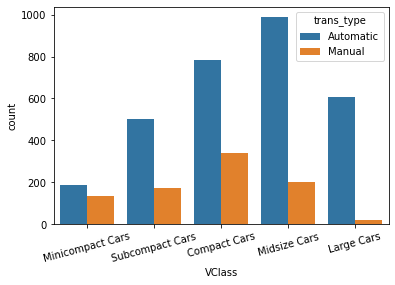

In [26]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');
plt.xticks(rotation = 15);

### Alternative Approach
### Example 2. Plot a Heat Map between two qualitative variables
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function heatmap() is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [15]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts= fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [16]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

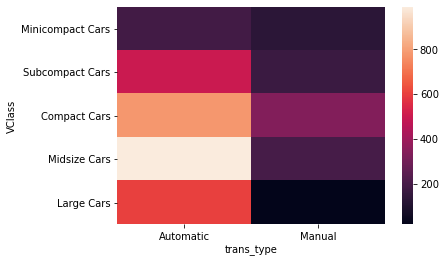

In [22]:
sb.heatmap(ct_counts)

**annot = True** makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding **fmt = 'd'** means that annotations will all be formatted as integers instead. You can use **fmt = '.0f'** if you have any cells with no counts, in order to account for NaNs.



<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

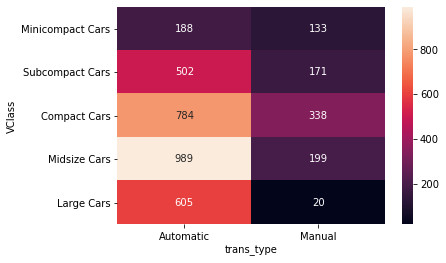

In [23]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

In [28]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [30]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


###  **TO DO**
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [31]:
# YOUR CODE HERE
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)


# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [32]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [33]:
fuel_econ.groupby(['VClass', 'fuelType']).size()

VClass            fuelType         
Minicompact Cars  Diesel                 0
                  Midgrade Gasoline      0
                  Natural Gas            0
                  Premium Gasoline     318
                  Regular Gasoline       3
Subcompact Cars   Diesel                 7
                  Midgrade Gasoline      0
                  Natural Gas            0
                  Premium Gasoline     534
                  Regular Gasoline     132
Compact Cars      Diesel                36
                  Midgrade Gasoline      0
                  Natural Gas            3
                  Premium Gasoline     593
                  Regular Gasoline     490
Midsize Cars      Diesel                32
                  Midgrade Gasoline      7
                  Natural Gas            0
                  Premium Gasoline     509
                  Regular Gasoline     640
Large Cars        Diesel                 5
                  Midgrade Gasoline     16
                  

In [34]:
# fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
only_gasoline = fuel_econ.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline"')
only_gasoline.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [35]:
df = only_gasoline.groupby(['VClass', 'fuelType']).size()
df

VClass            fuelType        
Minicompact Cars  Premium Gasoline    318
                  Regular Gasoline      3
Subcompact Cars   Premium Gasoline    534
                  Regular Gasoline    132
Compact Cars      Premium Gasoline    593
                  Regular Gasoline    490
Midsize Cars      Premium Gasoline    509
                  Regular Gasoline    640
Large Cars        Premium Gasoline    348
                  Regular Gasoline    256
dtype: int64

In [36]:
df = df.reset_index(name='count')
df

,VClass,fuelType,count
0,Minicompact Cars,Premium Gasoline,318
1,Minicompact Cars,Regular Gasoline,3
2,Subcompact Cars,Premium Gasoline,534
3,Subcompact Cars,Regular Gasoline,132
4,Compact Cars,Premium Gasoline,593
5,Compact Cars,Regular Gasoline,490
6,Midsize Cars,Premium Gasoline,509
7,Midsize Cars,Regular Gasoline,640
8,Large Cars,Premium Gasoline,348
9,Large Cars,Regular Gasoline,256


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Minicompact Cars'),
  Text(1, 0, 'Subcompact Cars'),
  Text(2, 0, 'Compact Cars'),
  Text(3, 0, 'Midsize Cars'),
  Text(4, 0, 'Large Cars')])

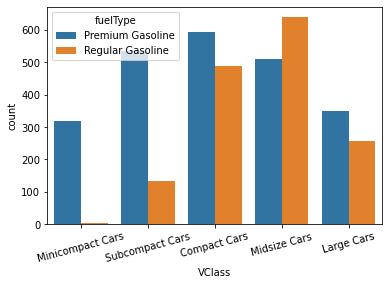

In [37]:
sb.countplot(data = only_gasoline, x = 'VClass', hue = 'fuelType')
plt.xticks(rotation = 15)